NOTE: CoLab usually autosaves your work, but just to be safe, make sure to save it manually too!


***Double click*** and enter your name here!

Name: Qianwen Luo

# Lab 3: 2D Cellular Automata continued, plus Schelling
This is your final lab with grid-based models before we break away from the grid next week with predator-prey!

Remember to read the assignment and comments thoroughly, as often times the answer to the exercises has been covertly inserted into the assignment! How sneaky of me.

As always, we are both at your disposal when you need assistance.

## Basic Coding Exercises
### Problem 1: Finding the length of a list (1 point)
We'll start off with an easy one. The function ```len()``` can be used to find the length of a list. This will come in handy later when you learn how to code up the Schelling model.

For this problem, use the codeblock below to create a list. You can create the list however you like: manually, with a ```for``` loop, or even using the ```range()``` function. Then, call ```len(list_name)``` to find the length of the list.

>NOTE: If you want to make a list using ```range()```, you need to turn your range output into a list using ```list(range())```. This is just a weird quirk of Python.

In [2]:
# <-- Your code goes here
list = [1, 2, 3, 4, 5, 6]
length = len(list)
print(length)

6


### Problem 2: List of tuples (3 points)
In the Schelling model, you're going to need to store two lists of locations. One list stores the locations of agents, and another list stores the locations of empty spots.

The reason that we need to do this is explained below, but to prepare for this you need to get used to storing lists of coordinates in the form (row, column).

In Python, the easiest way to do this is to put coordinates into something called a tuple, and then throw all of those tuples into a list. Tuples are denoted by ```()``` — round brackets.

>NOTE: the ```list.append()``` function is important here! For a refresher on it, see Lecture 3, Slide 18.

**2.A** (2 points) In the codeblock below, there are row and column locations for four different agents. Your job is to create tuples that each contain the coordinates for one agent. Then, create a list ```agent_locations``` and add the coordinates for every agent into the list. Finally, ```print()``` the list to see all of the agent locations.

In [4]:
agent0_row = 2
agent0_column = 0
# Set agent0_coordinate to be a (row, column) tuple
agent0_coordinate = (agent0_row, agent0_column)

agent1_row = 6
agent1_column = 1
agent1_coordinate = (agent1_row, agent1_column) # <--

agent2_row = 0
agent2_column = 8
agent2_coordinate = (agent2_row, agent2_column) # <--

agent3_row = 3
agent3_column = 4
agent3_coordinate = (agent3_row, agent3_column) # <--

agent_locations = [] # Make an empty list to which we can add the locations of our agents

# Add the coordinates of our agents to the list
agent_locations.append(agent0_coordinate)
agent_locations.append(agent1_coordinate)# <-- Add agent 1's coordinate to the list
agent_locations.append(agent2_coordinate)# <-- Add agent 2's coordinate to the list
agent_locations.append(agent3_coordinate)# <-- Add agent 3's coordinate to the list

# Then print the list of agent locations
print(agent_locations)

[(2, 0), (6, 1), (0, 8), (3, 4)]


Now that you've stored the agent locations in this clean way, you need to learn how to get that data back out so that you can use it!

Say we want to know what row one of our agents is in. We first need to access that agent's location using their index in the location list. That looks like this:

```agent_locations[agent_index]```

The code above will output a tuple of the form ```(row, column)```, but we just want the row. The row is the first entry of every tuple, entry 0. Therefore, we pull an agent's row using

```agent_locations[agent_index][0]```

**2.B** (1 point) In the codeblock below, pull agent 2's row and column back out of ```agent_locations```.

In [5]:
# Fill in your code here
Agent2_row = agent_locations[2][0] # <--
Agent2_column = agent_locations[2][1] # <--

print("Agent 2 is located at row", Agent2_row, "and column", Agent2_column)

Agent 2 is located at row 0 and column 8


### Problem 3: Introduction to Classes (2 points)
(Spoiler alert) For next week's lab, you'll be working on creating a Predator-Prey model like we saw in class on Wednesday. To do this, you'll need to create objects that have types and properties.

In the predator-prey example, you'll have a bunch of agent objects.

Below is some code from Lecture 8, Part B. Using this code, create 2 agents. One agent should be species ```"fox"```, and the other agent should be species ```"rabbit"```.

Place these agents at whatever coordinate you want, but make sure the two coordinates are different. Then, use the ```distanceTo()``` function of one of the agents to calculate the distance to the other agent.

In [7]:
import math

class Agent:
  # Initialize the agent properties
  position = (0, 0)
  species = ""

  # You can use the __init__() function to set the properties when you make a new agent
  def __init__(self, position, species):
    self.position = position
    self.species = species

  # This function uses the distance formula to calculate the distance between two coordinates!
  # You probably learned this in middle or high school, but don't worry if you forgot
  def distanceTo(self, pos):
    dx = pos[0] - self.position[0]
    dy = pos[1] - self.position[1]
    dist = math.sqrt(dx**2 + dy**2)
    print(dist)
    return dist

In [17]:
# <-- Your code goes here
fox_agent = Agent((3, 2), "fox")
rabbit_agent = Agent((1, 4), "rabbit")

rabbit_agent.distanceTo(fox_agent.position)

2.8284271247461903


2.8284271247461903

## 2D Cellular Automata Continued
### Problem 4: Smokey Bear's Worst Nightmare (20 points + 4 extra credit points)
>"Only you can create forest fires"

You've reached the end of the line, folks. This is the last cellular automata that you will code up for a lab. How sad. Lucky for you, it's a darn good one to end on.

To adapt a version of the forest fires model, we're going to make some slight adjustments to the voter model code that we already wrote in Lab 3. It turns out that once you know how to code up one cellular automata, you basically know how to code all of them. Cool, right?

In the following parts, you will implement the changes that you'll need in order to turn your voter model into a forest fires model. In the codeblocks, look for ```<--```.

First, we need to create our initial condition. In this cellular automata, each square represents a plot of land. We will use numbers to represent the following land states:

Land States:
*   0 — An empty plot of land
*   1 — A plot of land with trees
*   2 — A plot of land with a burning tree

**4.A** (1 point) Fill out the codeblock below to make an initial condition for your model. To start, create a forest of size 70 × 70. Initially, no trees are on fire, so every square in your initial forest can only be a tree or an empty plot.

Your initial forest should , on average, have 60% tree coverage, with the remaining 40% being empty land plots.

In [1]:
# Import the packages that we need
import random
import numpy as np

total_rows = 70 # <--
total_columns = 70 # <--

initial_forest = np.random.choice([0, 1], (total_rows, total_columns), p = [0.4, 0.6]) # <-- Create your initial condition here using total_rows and total_columns

**4.B** (1 point) Next, visualize your initial condition. I've added some code that increases the size of our visualization, and other code that tells the computer what colors to use to represent our different land states.

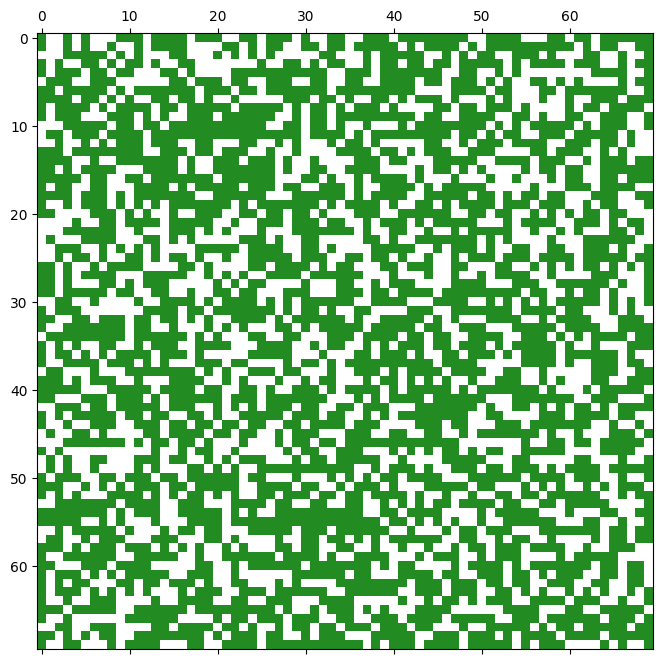

In [2]:
# We need to import some stuff from matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This makes the visualization bigger
fig, ax = plt.subplots(figsize=(8, 8))
# This tells Matplotlib what colors to use! White will be a blank space (0), forest green will represent a tree (1), and red will represent fire (2)
colorMap = ListedColormap(["white", "forestgreen", "red"])

# We pass four arguments to matshow: our 2D array, our map of colors, and vmin/vmax, which tell the computer which numbers correspond to which colors
ax.matshow(initial_forest, cmap = colorMap, vmin = 0, vmax = 2) # <--
fig.show()

**4.C** (2 points) Next, we'll need a method of counting the number of fires in the neighborhood of the current land plot. As a reminder, the current land plot is the square located at ```current_row```, ```current_column```.

In [3]:
# We use this function to count the number of fires in a neighborhood. It takes 5 arguments.

def count_fires(current_row, current_column, total_rows, total_columns, current_forest):

  neighborhood_fires = 0 # Initialize this variable to count the number of fires in the neighborhood

  # This loop goes through the neighborhood rows. We need to check current_row - 1 (up 1 row), current_row, and current_row + 1 (down 1 row)
  for neigh_row in range(current_row - 1, current_row + 2): # <--

    # This loop goes through the neighborhood columns. In every row, we need to check current_column - 1 (left 1 column), current_column,
    # and current_column + 1 (right 1 column)
    for neigh_column in range(current_column - 1, current_column + 2): # <--

      # <-- If the square we're checking is a fire, increase the neighborhood fire count by 1. Otherwise, do nothing.
      if current_forest[neigh_row % total_rows, neigh_column % total_columns] == 2:
        neighborhood_fires += 1

  # We return the neighborhood fire count
  return neighborhood_fires


Now it's time to make the rules function. This function takes the current land state and returns the next land state based on our rules.

Here's a rundown of this model's ***Rules:***

Empty plot:
*   In every timestep, an empty plot has a 0.3% chance of turning into a tree

Plot with vegetation (trees):
*   If there are fires in the neighborhood, each neighborhood fire increases the chance that the current plot ignites by 45%. That looks like a 45% chance with one neighborhood fire, a 90% chance with two neighborhood fires, and an 100% chance with 3 and above.
*   If there are no fires in the neighborhood, trees have a very tiny chance (.05%) of igniting randomly (think of a lightning strike or a neglectful smoker).

Burning plot:
*   If a plot is burning, it becomes an empty plot in the next timestep.

**4.D** (3 points) Complete the function ```land_state_rules()```. I've alredy filled the rules apply when ```current_land_state``` is an empty plot. Can you complete the rest?

In [4]:
# Here is our 2D land_state_rules(). The function takes 6 arguments,
# and returns what the next state of the land plot at current_row, current_column should be based on the rules.
def land_state_rules(current_row, current_column, current_land_state, current_forest, total_rows, total_columns):

  next_land_state = current_land_state # By default, the next state of this plot of land will be the same as the current one. Our code might change it!

  if current_land_state == 0: # Here's the logic if the current land state is empty (0).
    # turn into a tree with a certain probability
    if random.random() < .003:
      next_land_state = 1

  elif current_land_state == 1: # if current land state has a tree
    # count how many fires are in our neighborhood, we already made a function to do this for us
    neighborhood_fires = count_fires(current_row, current_column, total_rows, total_columns, current_forest) # <--
    # the tree has a probability of turning into fire based on the number of fires in its neighborhood
    if neighborhood_fires > 0:
      if random.random() < (0.45 * neighborhood_fires): # <-- min(neighborhood_fires, 3) How do we code in a 45% chance of igniting for each fire in the neighborhood?
        next_land_state = 2 # <--
    # the tree also has a small chance of randomly catching on fire
    else:
      if random.random() < .0005:
        next_land_state = 2 # <--

  else: # if current_land_state is fire
    next_land_state = 0 # <--

  return next_land_state # We send back the next_land_state based on the rules!

**4.E** (3 points) Time to make ```update()```. Fill in the codeblock below.

In [5]:
def update(current_forest, next_forest, total_rows, total_columns):

  # DON'T CHANGE! Initialize the current and next land state to be nothing (our code fills them in)
  next_land_state = None
  current_land_state = None

  # Iterate through every row and column
  for current_row in range(total_rows):
    for current_column in range(total_columns):
      current_land_state = current_forest[current_row, current_column] # <-- How to we pull the land state at the current location?

      next_land_state = land_state_rules(current_row, current_column, current_land_state, current_forest, total_rows, total_columns) # <-- What function revises the land state based on the rules?

      next_forest[current_row, current_column] = next_land_state # <-- Update the land state

  return next_forest.copy()

Below is the ```observe()``` function, which I have coded for you. This function conveniently contains all of the stuff that we need to visualize the current state of the forest. To get a nice visualization, all you have to do is call ```observe(current_forest)```!

In [6]:
# This tells Matplotlib what colors to use! White will be a blank space (0), forest green will represent a tree (1), and red will represent fire (2)
colorMap = ListedColormap(["white", "forestgreen", "red"])

def observe(current_forest):
  # This makes the visualization bigger
  fig, ax = plt.subplots(figsize=(8, 8))

  # We pass four arguments to matshow: our 2D array, our map of colors, and vmin/vmax, which tell the computer which numbers correspond to which colors
  ax.matshow(current_forest, cmap = colorMap, vmin = 0, vmax = 2)
  fig.show()

**4.F** (3 points) Now we are ready to run the model! Fill in the codeblock below. You will need to use ```display.clear_output(wait=True)``` to clear the output for animation purposes. Otherwise, you'll get 100 forests.

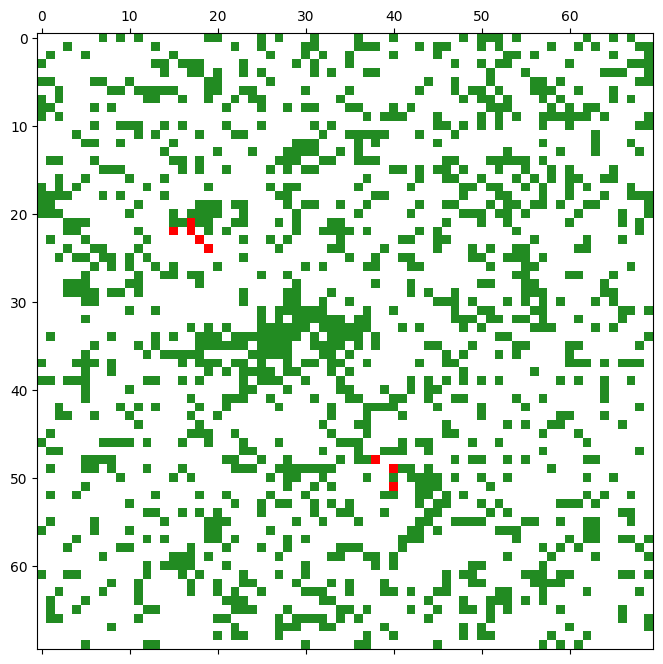

In [8]:
# NOTE: Make sure to run the code in parts A, B, C, D, and E so that your model runs correctly.

# Import the packages we need for animations:
import time
from IPython import display

current_forest = initial_forest.copy() # Set our initial forest state
observe(current_forest) # Visualize our initial state

# Now we make a temporary variable to store the next land states while we're running update()
next_forest = np.zeros([total_rows, total_columns]) # <-- Create a total_rows × total_columns array of zeros that we can use to store the next voter preferences (use np.zeros([]))

# Let's run the model for 100 timesteps to start
total_time_steps = 100

for current_timestep in range(total_time_steps): # <-- run the model for total_time_steps
  current_forest = update(current_forest, next_forest, total_rows, total_columns) # <-- What function do we use to update current forest?

  plt.close() # Close the last plot before making the new one
  observe(current_forest) # <-- Visualize this timestep. What function to we use to observe our forest using a visualization?

  # The lines of code below run the animation!
  display.display(plt.gcf())
  display.clear_output(wait=True) # <-- clear the output here
  time.sleep(0.5) # changing this number changes the speed of the visual updates

plt.close()

Now that you've successfully coded up the forest fires model, you can play with it a bit. Below is a suggested list of quantities you can change, but feel free to change whatever you want!

*   Probability that an empty plot turns into a tree (default 0.3%)
*   How much more likely each neighborhood fire is to ignite the current plot (default 45%)
*   Probability of trees igniting randomly (default 0.05%)

**4.G** (7 points) Change the model to your liking, then explain the following:

*   In detail, relay the changes that you made to the model and why you decided to make these changes
*   What happened to the model when you made these changes? Take a screenshot and embed it or include a link.
*   Do you think your changes made the model more or less realistic? Why?
>*FOR GRADING PURPOSES, RETURN THE MODEL TO ITS DEFAULTS AFTER ANSWERING THIS QUESTION*

***Double click*** and write down your response here!

I have included the link here to show the model when I made these changes.
https://colab.research.google.com/drive/1PfJHdGv02OHeIVzMyYEFnSTmCG7HLQQh?usp=sharing

1. We first change the robability that an empty plot turns into a tree (default 0.3%). In every timestep, an empty plot has a 5% (increased from 0.3%) chance of turning into a tree:

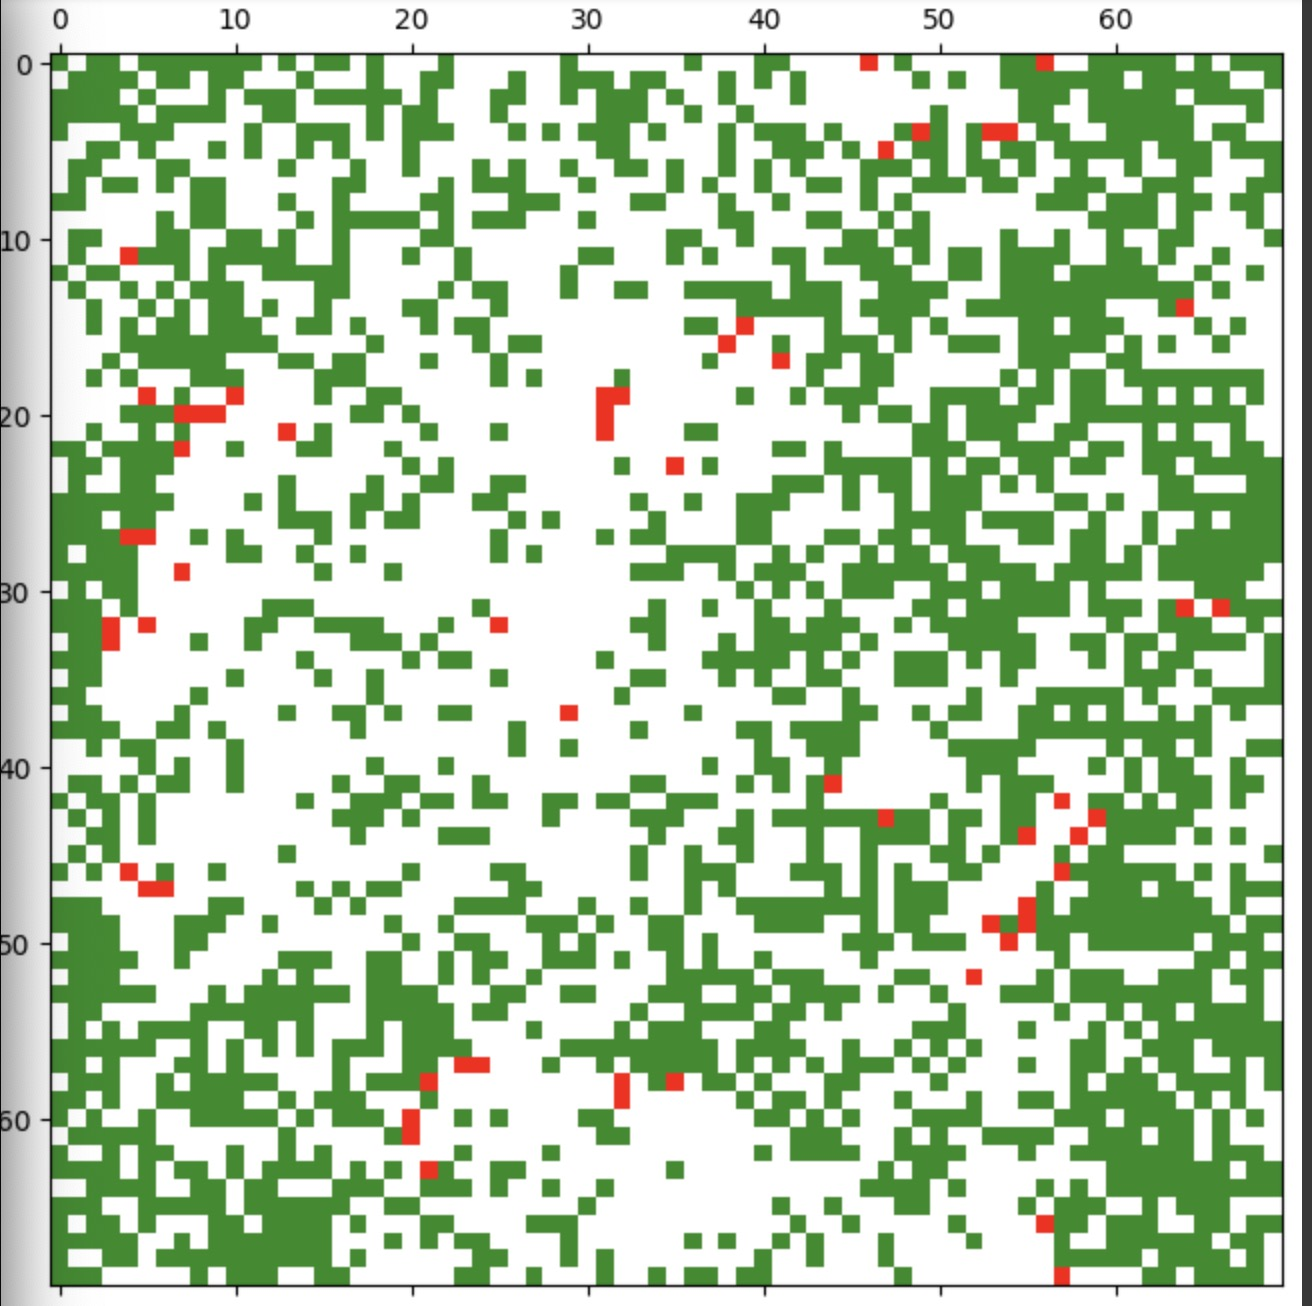

By increasing the speed of tree growth, we observe that the initial forsest became filled with trees more quirely with the higher speed. The graph above simulates a highly fertile land with more trees taking over the empty field.

2. Next we can decrease how much more likely each neighborhood fire is to ignite the current plot to 0.3 (default 45%)

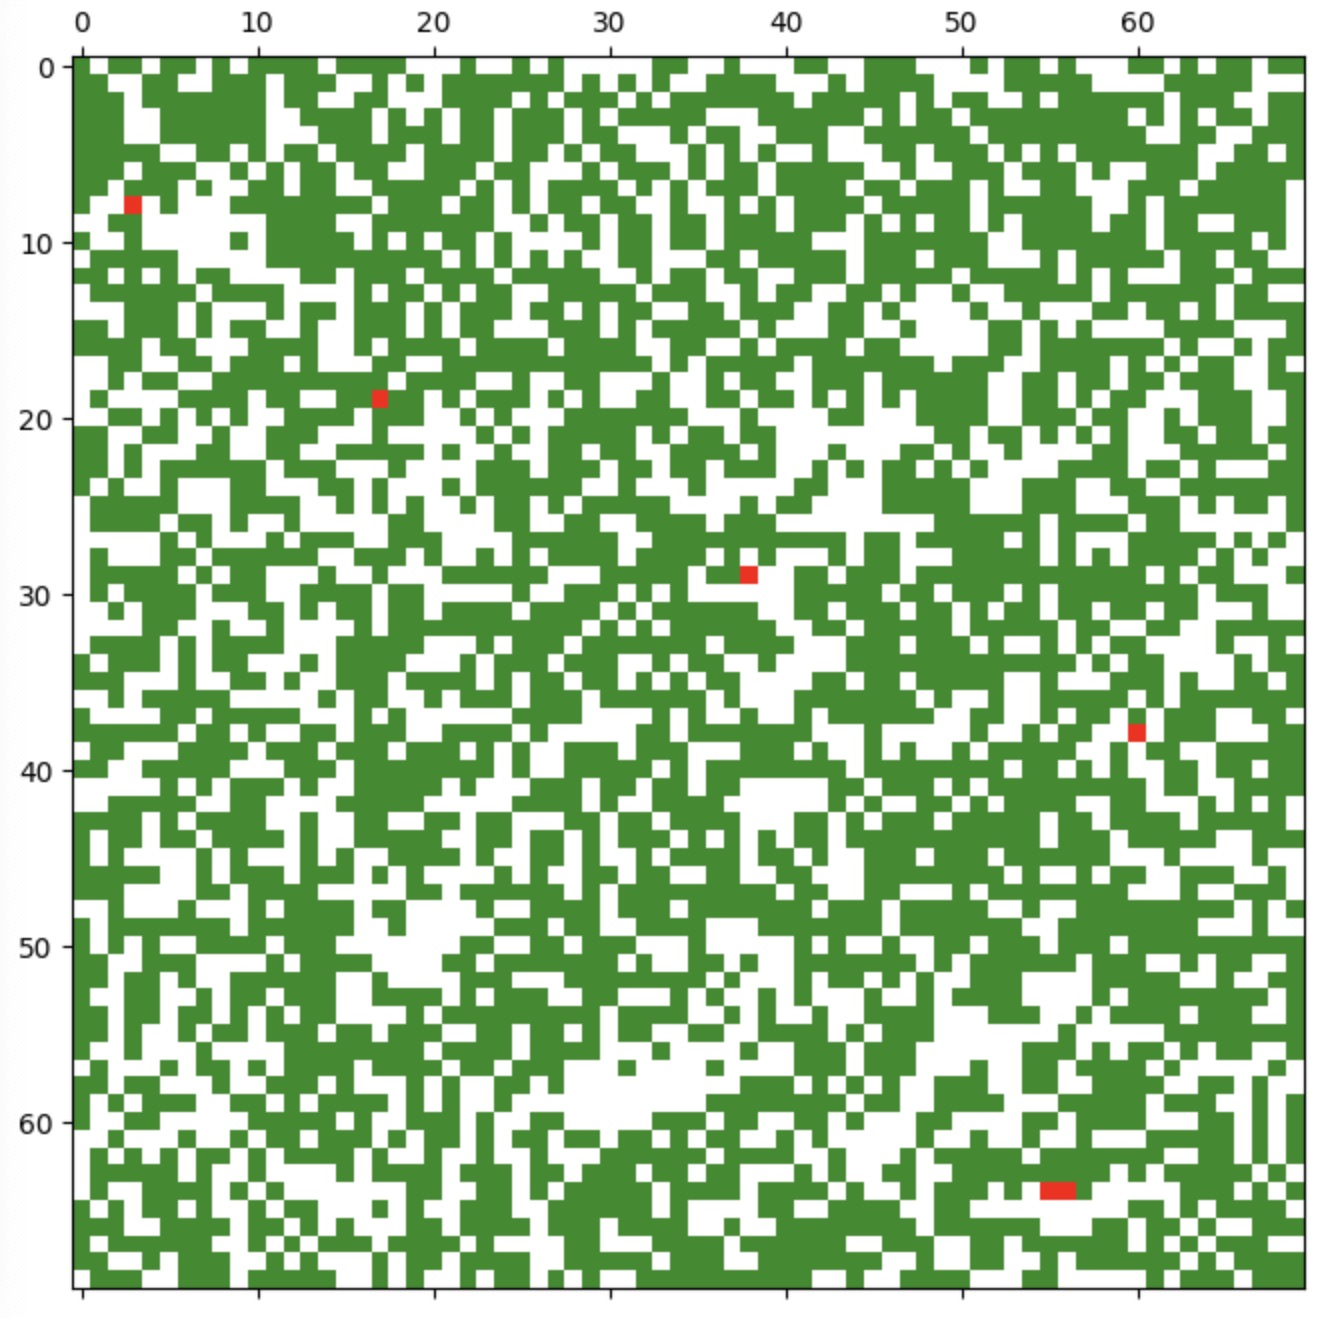

When decreasing the probability of each neighborhood fire igniting the current cell, we observe that the fire expand less quickly. In the graph above, we can only see a smaller field of fire and the forest becomes more resistant to the fire.

3. Besides, we can decrease the probability of trees igniting randomly to 0.001 (default 0.05%)

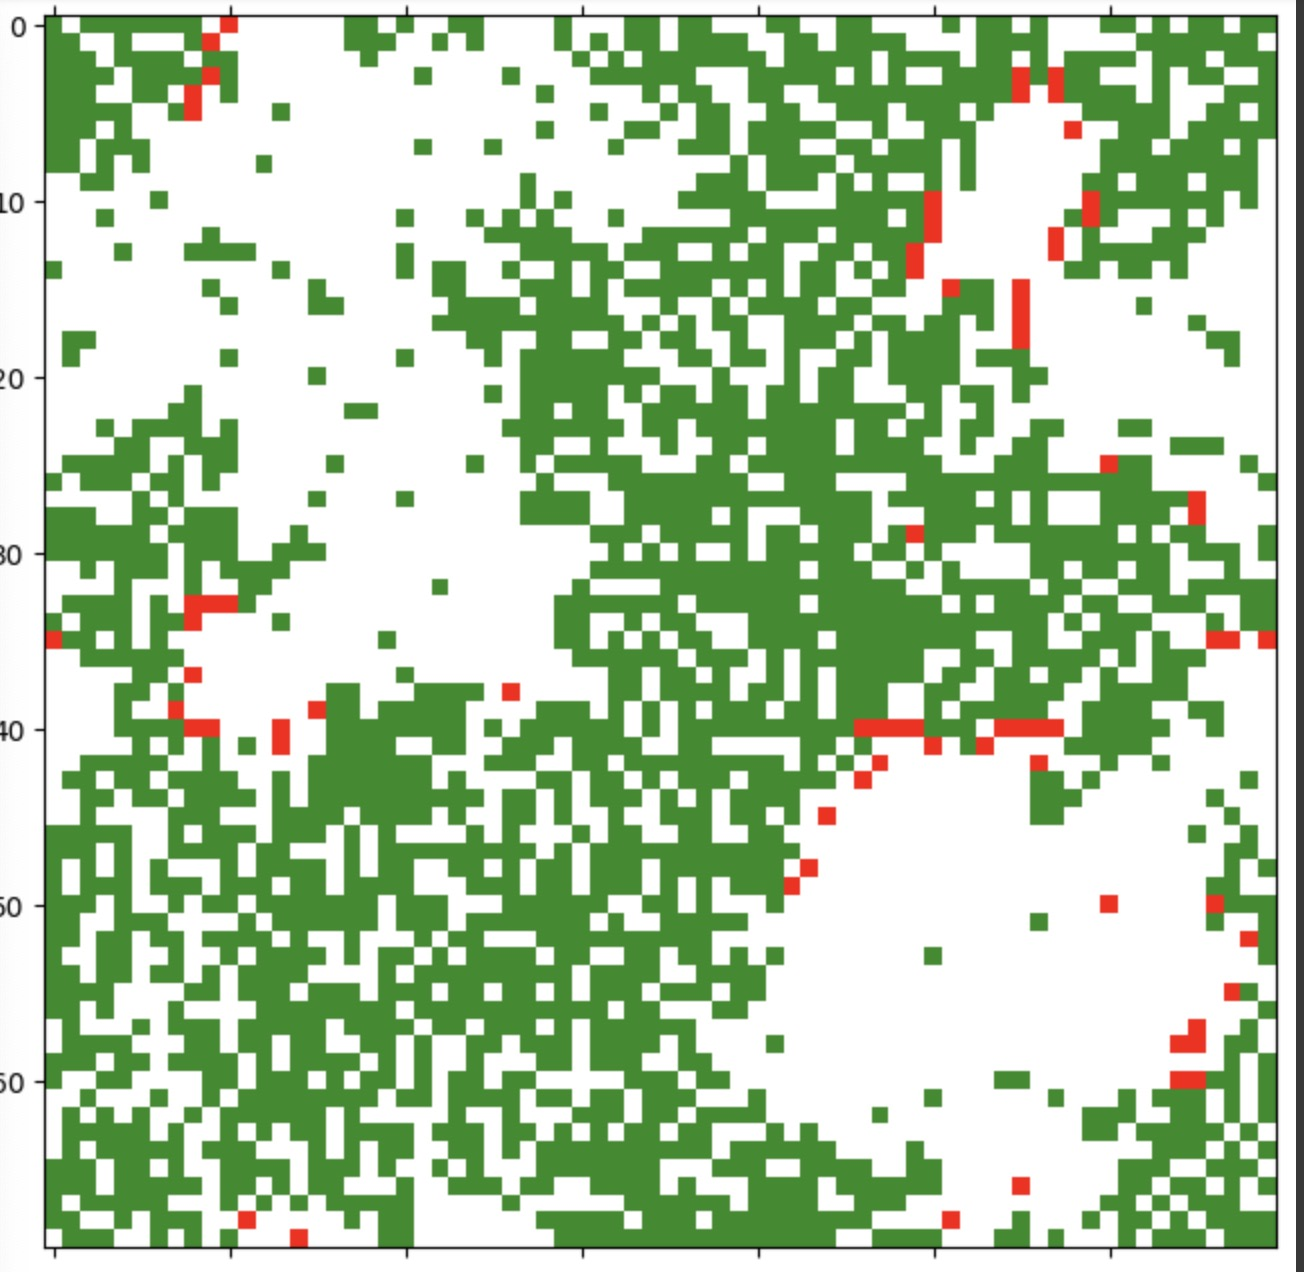

By decreasing the probability of trees igniting randomly, we observe that fire occurs less frequently and forest area becomes more intact due to less external ignition sources. The graph above shows that the forest has higher chance to grow back before the subsequent fire swept through.

4. Combined the above changes together

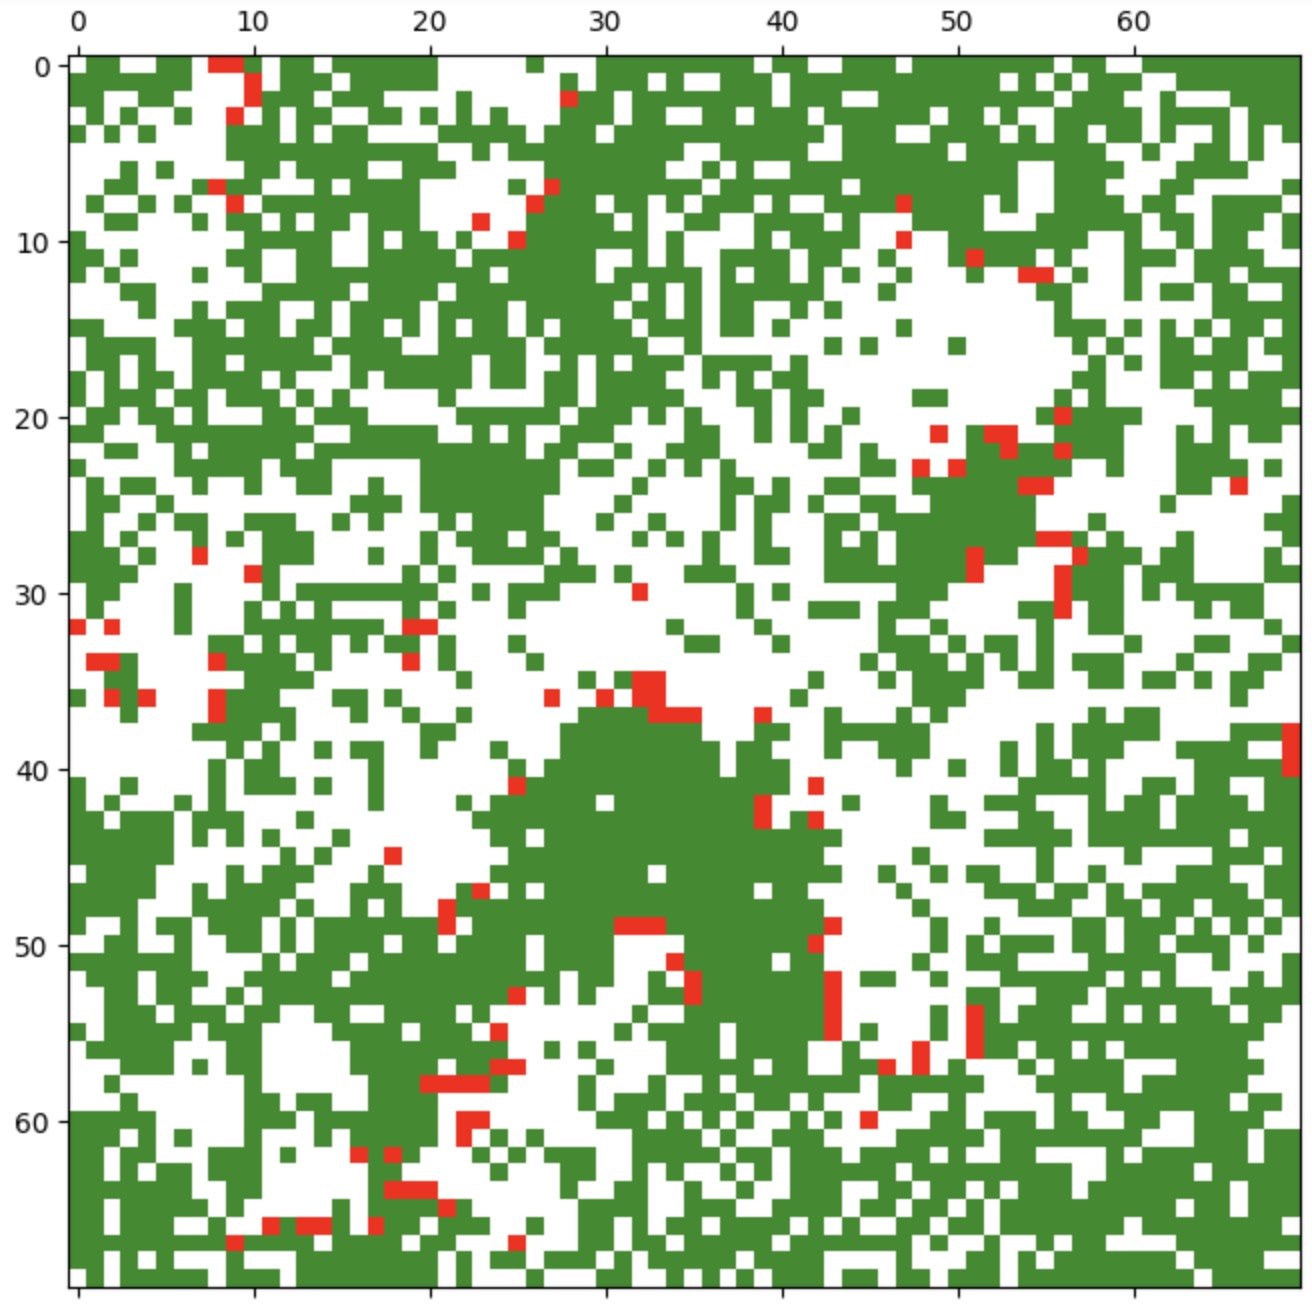

When we combined these changes together, we observe that the forest becomes more fertile and intact. The trees grow more rapidly and the spread of fire is slower than the original model since the ignition probability is reduced.



Making these changes would make the model more realistic in some circumstances. If the forest is more fertile in the real world (in some specific areas), the tree can regrow in a faster speed and becomes more resistant to the fire.
Also, if the fire control agencies take part in slowing the fire expansion, the fire might spread at a slower rate in reality. When considering human factors, we can manage the fire properly so that fires igniting randomly less often seems more accurate.

**4.H** (Extra credit: 4 points) Come up with another potential application of the forest fires model, or a different model that would require minimal changes to forest fires. Then, answer the following:

*   How is your process similar to forest fires? How is it different?
*   If changes are required to apply the forest fires model in your context, explain what alterations you would need to make.



***Double click*** and write down your response here!

A potential application of the forest model could be the spread of false information on social media.

This process is similar to forest fires because when people are browsing on the internet, they are exposed to many fake news and false information. Similar to how a burning tree can ignite neighboring trees, those who have read the false information can also spread these news to their neighbors. Also, as the fire stops and turns into an empty cell, the fake news would stop when the people realize the truth.

The spreading of false news is different to the forest fire since fake news acceptance is largely detemined and influenced by some personal beliefs. Furthermore, the internet network can't be simply represented by the 2D grid as it is interconnected between each individual.

We can make some changes to the model. Firstly, we should modify the 2D grid to a interconnected network, possibly a graph that connects each individual. Then, the empty cell means that the person is not exposed to or unaware of the information. The tree state would be the person who has read the information but is not sharing it. The fire state would be the person who is spreading the fake news. Besides, we can add several external factors and human intervention into this model. For example, official accounts on social media can post the real information to prevent the spread of fake news.

## Grid-based, Non-cellular automata
### Problem 5: Judge People Not by the Color of their Skin, but by the Content of their Agent-Based Models (24 points + 6 extra credit points)
Now we'll move on from cellular automata to the Schelling segregation model. The Schelling model has a lot in common with cellular automata. For example, it shares a grid-based structure and the concept of a "neighborhood."

In this model, agents have a slight preference for "sameness," meaning that they want a certain number of their neighbors to be like them. They move to random empty spots in the grid until they find one that satisfies their criteria, at which point they stop. For a reminder of how it works, see Lecture 6, Slide 19. You can also check out the emoji simulator implementation [here](https://ncase.me/sim/?s=schelling).

This model has been applied to many common indicators of population dynamics, including skin color, ethnicity/culture, religion, age, socioeconimics, marital status, political affiliation, and more.
___________
We'll begin by creating our initial condition. For this model to work, we need to make and maintain two lists:

1.   a list of which squares are empty (```empty_locations```)
2.   a list of which squares contain an agent (```agent_locations```)

Recall that each square in the grid has a (row, column) index. These two lists will contain a bunch of (row, column) indices that tell us where we can find agents/empty squares.

You may be wondering: we didn't need lists like this in cellular automata, so why do we need to keep track of this information in the Schelling model? Well, I'm really glad that you asked this astute and pertinent question. Allow me to enlighten you:

1.    Keeping a list of which indices contain agents will help us to loop through our agents in a random order so that we don't update the squares in the exact same order every time.
2.    Keeping a list of which indices are empty squares will allow us to easily move unsatisfied agents to an empty square.

Because we need to make these special lists, we sadly have to fill our initial grid manually instead of using ```np.random.choice()```. That means making an array of all zeros, and then using two ```for``` loops to go through the entire array and randomly assign a state to each square.

Here are what our states represent in the Schelling model:
*   0 — An empty space/dwelling
*   1 — An agent/individual of type red
*   2 — An agent/individual of type blue

We'll make our initial world grid 50 × 50, with 70% agents and 30% blank squares. Of the 70% of squares that are agents, half will be red and the other half will be blue.

This model updates one agent at a time. Therefore, instead of having a ```current_world``` and a ```next_world```, we'll just keep updating ```current_world``` as we go.

As always, look for ```<--``` when filling in codeblocks.

**5.A** (4 points) Using the (admittedly lengthy) instructions above, fill in the codeblock below to manually generate our initial condition. Then, print it.
>NOTE: the ```list.append()``` function is important here! For a refresher on it, see Lecture 3, Slide 18.

In [1]:
# Import the functions that we need
import numpy as np
import random

# Set your number of rows and columns
total_columns = 50 # <--
total_rows = 50 # <--

def initializeSchel():
    # We declare global variables here so that we don't need to use arguments. All functions can see global variables!
    global time_counter, current_world, agent_locations, empty_locations

    current_world = np.zeros([total_rows, total_columns]) # <-- Use np.zeros([]) and total_rows/columns to initialize our world state with all zeros (we'll fill it in manually)

    # Make the lists that we need to keep track of indices
    agent_locations = [] # Initialize agent_locations as an empty list, our code will fill it in later
    empty_locations = [] # <-- ^ Same

    # Resets the time counter
    time_counter = 0

    # Now, we will iterate through the entire array using nested for loops, a process with which you should now be intimately familiar
    for current_row in range(total_rows): # <--
        for current_column in range(total_columns): # <--

            # We need a 70% chance that the square is an agent
            if random.random() < 0.7: # <--

                # If we randomly generated a number less than .7, we make an agent!
                if random.random() < 0.5: # <-- There's a 50% chance our agent is red
                    current_world[current_row, current_column] = 1
                # else if the agent wasn't assigned to red, we need to make it blue
                else:
                    current_world[current_row, current_column] = 2 # <--

                # Now, we need to add this agent to our list of agents
                agent_locations.append((current_row, current_column))

            else: # If our spot isn't an agent, it's empty.
            # Because our array is already all zeros, all we have to do is add this index to the list of empty locations
                empty_locations.append((current_row, current_column)) # <--

initializeSchel()

print(current_world) # <-- Print the initial condition you made (current_world) to make sure your code works!

[[2. 1. 2. ... 2. 0. 2.]
 [0. 2. 0. ... 2. 2. 0.]
 [1. 2. 0. ... 1. 1. 2.]
 ...
 [1. 1. 0. ... 1. 0. 1.]
 [2. 2. 2. ... 2. 2. 0.]
 [2. 0. 1. ... 1. 1. 2.]]


**5.B** (1 point) Now, we can visualize our initial condition. To do that, fill in the codeblock below.

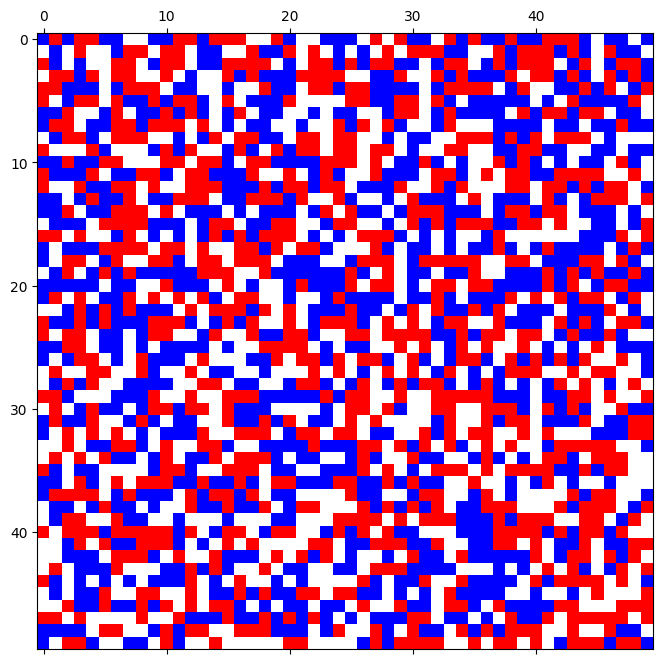

In [2]:
# We need to import some stuff from matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This tells Matplotlib what colors to use! White will be a blank space (0), red will be a red agent (1), and blue will be a blue agent (2)
colorMap = ListedColormap(["white", "red", "blue"]) # <--

fig, ax = plt.subplots(figsize=(8, 8)) # Makes the plot bigger

# We pass four arguments to matshow: our 2D array (current_world), our map of colors, and vmin/vmax, which tell the computer which numbers correspond to which colors
ax.matshow(current_world, cmap = colorMap, vmin = 0, vmax = 2) # <--
fig.show()

We need an ```is_satisfied()``` funtion to check agents' neighborhoods and count the number of like neighbors.

Similar to the ```count_fires()``` function that you made above, and the ```count_neighborhood_votes()``` function that you made in Lab 3, you need to check a neighborhood and sum neighbors of a certain type.

Unlike those other functions, this function will ```return True``` if the agent has enough like neighbors and ```return False``` if not.

**5.C** (3 points) Create the ```is_satisfied``` function. For now, let's say that agents require at least 4 like neighbors in order to be satisfied.

In [3]:
# We use this function to see if our agent has enough like neighbors to be satisfied. It takes 5 arguments.

def is_satisfied(current_row, current_column, total_rows, total_columns, current_world):

  current_agent_type = current_world[current_row, current_column] # <-- grab the type of the current agent
  num_like_neighbors = 0 # Initialize this variable to count the number of like neighbors in the neighborhood

  enough_like_neighbors = False # Initialize this variable to report if the agent has enough like neighbors to be satisfied.

  # This loop goes through the neighborhood rows. We need to check current_row - 1 (up 1 row), current_row, and current_row + 1 (down 1 row)
  for neigh_row in range(current_row-1, current_row+2): # <--

    # This loop goes through the neighborhood columns. In every row, we need to check current_column - 1 (left 1 column), current_column,
    # and current_column + 1 (right 1 column)
    for neigh_column in range(current_column-1, current_column+2): # <--

      # Add this conditional so that the code doesn't count the current agent as a neighbor
      if not ((neigh_row == current_row) and (neigh_column == current_column)):

        current_neighbor_type = current_world[neigh_row % total_rows, neigh_column % total_columns] # <-- Find the type of the current neighbor

        # If the square we're checking is the same type as the current agent, increase the num_like_neighbors count by 1. Otherwise, do nothing.
        if (current_neighbor_type == current_agent_type):
          num_like_neighbors += 1 # <--

        # If we have more than 3 like neighbors, that's enough, so the function reports that we're satisfied (True)
        if num_like_neighbors > 3: # <--
          enough_like_neighbors = True # <--
          return enough_like_neighbors

  # If we don't have enough like neighbors, we report False
  return enough_like_neighbors


Now, it's time to make the ```updateSchel()``` function, which tells our agents what to do if they're satisfied (nothing) and what to do if they're not satisfied (move to an empty space).

Because we need to go through our agents in a random order, we first create a shuffled ```range()``` list to use in our ```for``` loop. Then, we go through our agents in a random order and check if each one is satisfied.

If they're not satisfied, we need to move them! We move agents with the following 5 step process:


1.   Grab a new location from our list of empty locations
2.   To keep our list of agent locations updated, change the current agent's list entry to the new location
3.   Move the agent! Set the type/color of the new location to be the same type/color as the old location
4.   To keep track of where empty spots are, add the old location to the empty locations list
5.   Finally, remove the agent from the old location by setting it to an empty spot

**5.D.** (4 points) Fill in the ```updateSchel()``` function. You will need to use ```random.shuffle()``` from Lecture 3, Slide 38.

In [4]:
def updateSchel():
    # We declare global variables here so that we don't need to use arguments. All functions can see global variables!
    global time_counter, current_world, agent_locations, empty_locations

    # On every update, the time counter ticks up by 1
    time_counter += 1

    num_agents = len(agent_locations) # <-- Find the number of agents we have by finding the length of the agent_locations list

    # This piece of code takes the number of agents that we have and makes a range() list, just like the ones we normally use
    custom_range_list = list(range(num_agents))
    # But this time, we shuffle the range list so that our for loop goes through the agents in a random order
    random.shuffle(custom_range_list) # <-- Use random.shuffle() to randomize the order of this range list

    # Loop through all of the agents in random order using custom_range_list
    for current_agent in custom_range_list: # <--

        # Grab our current_row and current_column
        current_row, current_column = agent_locations[current_agent]

        # If the agent isn't satisfied, move it to a random empty spot! This is a 5 step process, but each step is simple.
        if not is_satisfied(current_row, current_column, total_rows, total_columns, current_world):
            # 1. Grab a new location from our list of empty spots
            empty_index = random.randint(0, len(empty_locations) - 1)
            new_row, new_column = empty_locations[empty_index]

            # 2. Change the list entry for the current agent to the new location
            agent_locations[current_agent] = (new_row, new_column)

            # 3. To move the agent, set the type of the new location equal to the type of the current location
            current_world[new_row, new_column] = current_world[current_row, current_column] # <--

            # 4. Now add the current location to the empty list
            empty_locations[empty_index] = (current_row, current_column)

            # 5. And remove the agent from the current location by setting it to an empty spot
            current_world[current_row, current_column] = 0 # <--

**5.E** (2 points) We can now make the ```observeSchel()``` function, which allows us to visualize the current state of the world. Fill it in below.

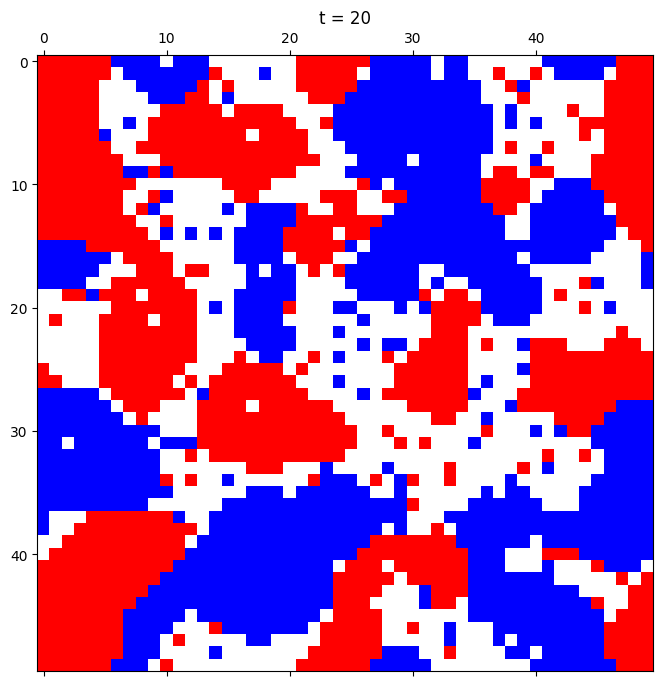

In [9]:
# We need to import some stuff from matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This tells Matplotlib what colors to use! White will be a blank space (0), red will be a red agent (1), and blue will be a blue agent (2)
colorMap = ListedColormap(["white", "red", "blue"]) # <-- make the color map

def observeSchel():
  # This makes the visualization bigger
  fig, ax = plt.subplots(figsize=(8, 8))

  # We pass four arguments to matshow: our 2D array, our map of colors, and vmin/vmax, which tell the computer which numbers correspond to which colors
  ax.matshow(current_world, cmap = colorMap, vmin = 0, vmax = 2) # <-- use plt.matshow to visualize the current_world
  plt.axis('image')
  plt.title('t = ' + str(time_counter)) # This puts the time counter on top of our visualization!
  fig.show()

observeSchel() # Run observeSchel() to visualize the initial condition you made

**5.F** (2 points) Run the model

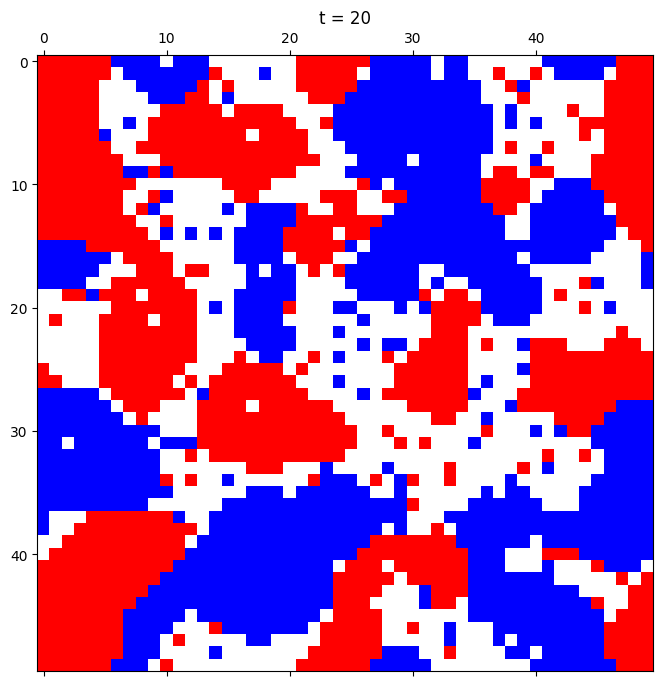

In [8]:
# NOTE: Make sure to run the code in parts A, B, C, D, and E so that your model runs correctly.

# Import the packages we need for animations:
import time
from IPython import display

initializeSchel() # Set our initial world state
observeSchel() # Visualize our initial state

# Let's run the model for 20 timesteps to start
total_time_steps = 20 # <--

for current_timestep in range(total_time_steps): # <-- run the model for total_time_steps
  updateSchel()# <-- What function do we use to update the current world?

  plt.close() # Close the last plot before making the new one
  observeSchel()# <-- Visualize this timestep. What function to we use to observe our world using a visualization?

  # The lines of code below run the animation!
  display.display(plt.gcf())
  display.clear_output(wait=True) # clear the output here
  time.sleep(0.1) # changing this number changes the speed of the visual updates

plt.close()

One cool thing that we can do with the Schelling model is change the "tolerance" of agents, or how many like neighbors they need to be satisfied. The default is more than 3. You can change this in the ```is_satisfied``` function. Some tolerances may not settle to a fixed state!

**5.G** (8 points) Play with the tolerances a bit, then answer the following:

*   Set the tolerance to ```num_like_neighbors > 2```. How does this change the clump size?
*   Set the tolerance to ```num_like_neighbors > 4``` and answer the same question.
*   When you set the tolerance to 5 or greater, what happens? Why do you think this is the case?

>*FOR GRADING PURPOSES, RETURN THE MODEL TO ITS DEFAULTS AFTER ANSWERING THIS QUESTION*

1. First set the tolerance to num_like_neighbors > 2

In [20]:
# We use this function to see if our agent has enough like neighbors to be satisfied. It takes 5 arguments.

def is_satisfied(current_row, current_column, total_rows, total_columns, current_world):

  current_agent_type = current_world[current_row, current_column] # <-- grab the type of the current agent
  num_like_neighbors = 0 # Initialize this variable to count the number of like neighbors in the neighborhood

  enough_like_neighbors = False # Initialize this variable to report if the agent has enough like neighbors to be satisfied.

  # This loop goes through the neighborhood rows. We need to check current_row - 1 (up 1 row), current_row, and current_row + 1 (down 1 row)
  for neigh_row in range(current_row-1, current_row+2): # <--

    # This loop goes through the neighborhood columns. In every row, we need to check current_column - 1 (left 1 column), current_column,
    # and current_column + 1 (right 1 column)
    for neigh_column in range(current_column-1, current_column+2): # <--

      # Add this conditional so that the code doesn't count the current agent as a neighbor
      if not ((neigh_row == current_row) and (neigh_column == current_column)):

        current_neighbor_type = current_world[neigh_row % total_rows, neigh_column % total_columns] # <-- Find the type of the current neighbor

        # If the square we're checking is the same type as the current agent, increase the num_like_neighbors count by 1. Otherwise, do nothing.
        if (current_neighbor_type == current_agent_type):
          num_like_neighbors += 1 # <--

        # If we have more than 2 like neighbors, that's enough, so the function reports that we're satisfied (True)
        if num_like_neighbors > 2: # Change from 3 to 2
          enough_like_neighbors = True # <--
          return enough_like_neighbors

  # If we don't have enough like neighbors, we report False
  return enough_like_neighbors

def updateSchel():
    # We declare global variables here so that we don't need to use arguments. All functions can see global variables!
    global time_counter, current_world, agent_locations, empty_locations

    # On every update, the time counter ticks up by 1
    time_counter += 1

    num_agents = len(agent_locations) # <-- Find the number of agents we have by finding the length of the agent_locations list

    # This piece of code takes the number of agents that we have and makes a range() list, just like the ones we normally use
    custom_range_list = list(range(num_agents))
    # But this time, we shuffle the range list so that our for loop goes through the agents in a random order
    random.shuffle(custom_range_list) # <-- Use random.shuffle() to randomize the order of this range list

    # Loop through all of the agents in random order using custom_range_list
    for current_agent in custom_range_list: # <--

        # Grab our current_row and current_column
        current_row, current_column = agent_locations[current_agent]

        # If the agent isn't satisfied, move it to a random empty spot! This is a 5 step process, but each step is simple.
        if not is_satisfied(current_row, current_column, total_rows, total_columns, current_world):
            # 1. Grab a new location from our list of empty spots
            empty_index = random.randint(0, len(empty_locations) - 1)
            new_row, new_column = empty_locations[empty_index]

            # 2. Change the list entry for the current agent to the new location
            agent_locations[current_agent] = (new_row, new_column)

            # 3. To move the agent, set the type of the new location equal to the type of the current location
            current_world[new_row, new_column] = current_world[current_row, current_column] # <--

            # 4. Now add the current location to the empty list
            empty_locations[empty_index] = (current_row, current_column)

            # 5. And remove the agent from the current location by setting it to an empty spot
            current_world[current_row, current_column] = 0 # <--


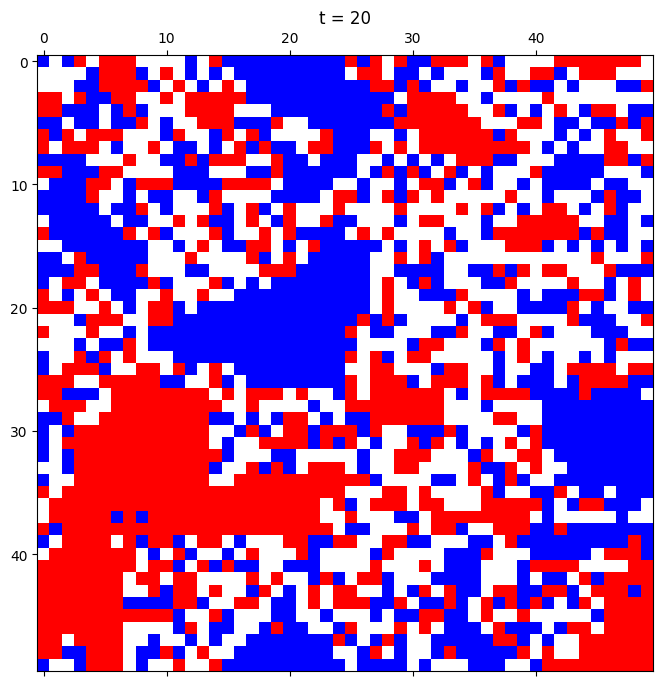

In [21]:
# We need to import some stuff from matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This tells Matplotlib what colors to use! White will be a blank space (0), red will be a red agent (1), and blue will be a blue agent (2)
colorMap = ListedColormap(["white", "red", "blue"]) # <-- make the color map

def observeSchel():
  # This makes the visualization bigger
  fig, ax = plt.subplots(figsize=(8, 8))

  # We pass four arguments to matshow: our 2D array, our map of colors, and vmin/vmax, which tell the computer which numbers correspond to which colors
  ax.matshow(current_world, cmap = colorMap, vmin = 0, vmax = 2) # <-- use plt.matshow to visualize the current_world
  plt.axis('image')
  plt.title('t = ' + str(time_counter)) # This puts the time counter on top of our visualization!
  fig.show()

observeSchel() # Run observeSchel() to visualize the initial condition you made

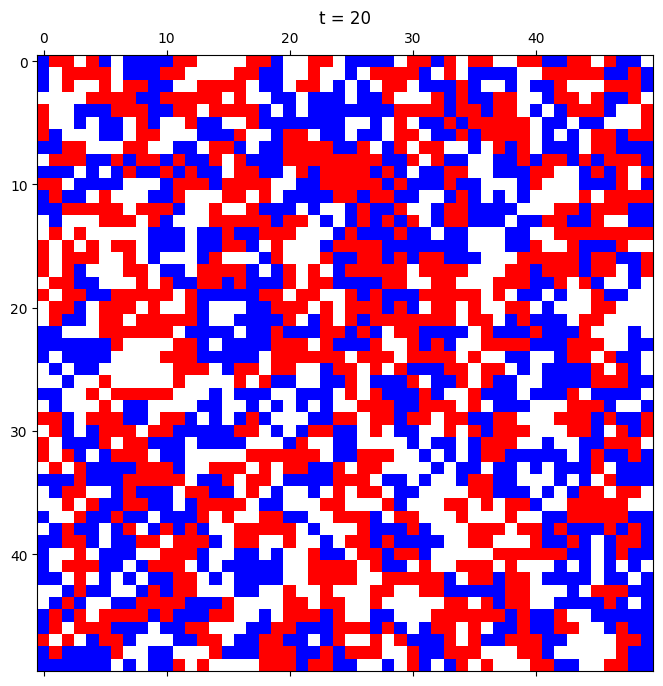

In [22]:
# NOTE: Make sure to run the code in parts A, B, C, D, and E so that your model runs correctly.

# Import the packages we need for animations:
import time
from IPython import display

initializeSchel() # Set our initial world state
observeSchel() # Visualize our initial state

# Let's run the model for 20 timesteps to start
total_time_steps = 20 # <--

for current_timestep in range(total_time_steps): # <-- run the model for total_time_steps
  updateSchel()# <-- What function do we use to update the current world?

  plt.close() # Close the last plot before making the new one
  observeSchel()# <-- Visualize this timestep. What function to we use to observe our world using a visualization?

  # The lines of code below run the animation!
  display.display(plt.gcf())
  display.clear_output(wait=True) # clear the output here
  time.sleep(0.1) # changing this number changes the speed of the visual updates

plt.close()

**Observations: **

By setting the tolerance to num_like_neighbors > 2, we notice that agents can be satisfied with fewer like neighbors.
The clumps and continuous parts each tend to be smaller. The blue parts and the red parts are mixed and scattered throughout the whole grid. By decreasing the tolerance, we observe a blended and mixed pattern.

2. Set the tolerance to num_like_neighbors > 4

In [23]:
# We use this function to see if our agent has enough like neighbors to be satisfied. It takes 5 arguments.

def is_satisfied(current_row, current_column, total_rows, total_columns, current_world):

  current_agent_type = current_world[current_row, current_column] # <-- grab the type of the current agent
  num_like_neighbors = 0 # Initialize this variable to count the number of like neighbors in the neighborhood

  enough_like_neighbors = False # Initialize this variable to report if the agent has enough like neighbors to be satisfied.

  # This loop goes through the neighborhood rows. We need to check current_row - 1 (up 1 row), current_row, and current_row + 1 (down 1 row)
  for neigh_row in range(current_row-1, current_row+2): # <--

    # This loop goes through the neighborhood columns. In every row, we need to check current_column - 1 (left 1 column), current_column,
    # and current_column + 1 (right 1 column)
    for neigh_column in range(current_column-1, current_column+2): # <--

      # Add this conditional so that the code doesn't count the current agent as a neighbor
      if not ((neigh_row == current_row) and (neigh_column == current_column)):

        current_neighbor_type = current_world[neigh_row % total_rows, neigh_column % total_columns] # <-- Find the type of the current neighbor

        # If the square we're checking is the same type as the current agent, increase the num_like_neighbors count by 1. Otherwise, do nothing.
        if (current_neighbor_type == current_agent_type):
          num_like_neighbors += 1 # <--

        # If we have more than 4 like neighbors, that's enough, so the function reports that we're satisfied (True)
        if num_like_neighbors > 4: # Change from 3 to 4
          enough_like_neighbors = True # <--
          return enough_like_neighbors

  # If we don't have enough like neighbors, we report False
  return enough_like_neighbors

def updateSchel():
    # We declare global variables here so that we don't need to use arguments. All functions can see global variables!
    global time_counter, current_world, agent_locations, empty_locations

    # On every update, the time counter ticks up by 1
    time_counter += 1

    num_agents = len(agent_locations) # <-- Find the number of agents we have by finding the length of the agent_locations list

    # This piece of code takes the number of agents that we have and makes a range() list, just like the ones we normally use
    custom_range_list = list(range(num_agents))
    # But this time, we shuffle the range list so that our for loop goes through the agents in a random order
    random.shuffle(custom_range_list) # <-- Use random.shuffle() to randomize the order of this range list

    # Loop through all of the agents in random order using custom_range_list
    for current_agent in custom_range_list: # <--

        # Grab our current_row and current_column
        current_row, current_column = agent_locations[current_agent]

        # If the agent isn't satisfied, move it to a random empty spot! This is a 5 step process, but each step is simple.
        if not is_satisfied(current_row, current_column, total_rows, total_columns, current_world):
            # 1. Grab a new location from our list of empty spots
            empty_index = random.randint(0, len(empty_locations) - 1)
            new_row, new_column = empty_locations[empty_index]

            # 2. Change the list entry for the current agent to the new location
            agent_locations[current_agent] = (new_row, new_column)

            # 3. To move the agent, set the type of the new location equal to the type of the current location
            current_world[new_row, new_column] = current_world[current_row, current_column] # <--

            # 4. Now add the current location to the empty list
            empty_locations[empty_index] = (current_row, current_column)

            # 5. And remove the agent from the current location by setting it to an empty spot
            current_world[current_row, current_column] = 0 # <--

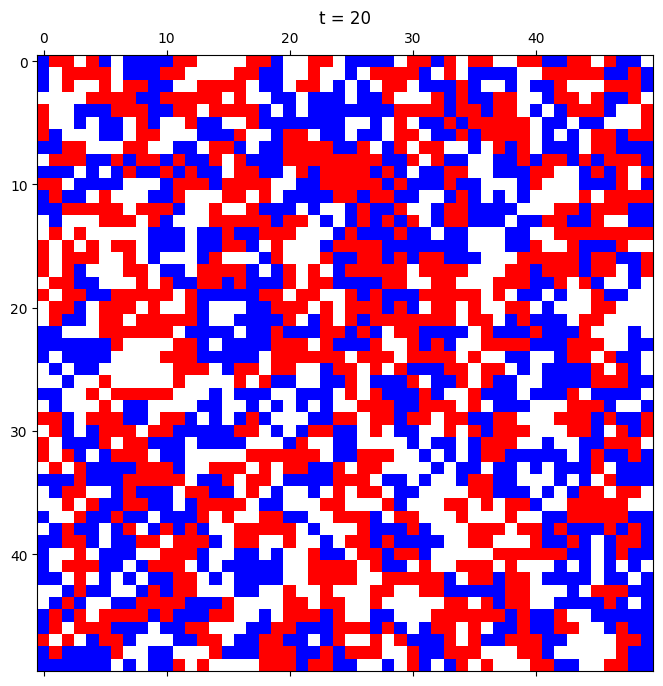

In [24]:
# We need to import some stuff from matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This tells Matplotlib what colors to use! White will be a blank space (0), red will be a red agent (1), and blue will be a blue agent (2)
colorMap = ListedColormap(["white", "red", "blue"]) # <-- make the color map

def observeSchel():
  # This makes the visualization bigger
  fig, ax = plt.subplots(figsize=(8, 8))

  # We pass four arguments to matshow: our 2D array, our map of colors, and vmin/vmax, which tell the computer which numbers correspond to which colors
  ax.matshow(current_world, cmap = colorMap, vmin = 0, vmax = 2) # <-- use plt.matshow to visualize the current_world
  plt.axis('image')
  plt.title('t = ' + str(time_counter)) # This puts the time counter on top of our visualization!
  fig.show()

observeSchel() # Run observeSchel() to visualize the initial condition you made

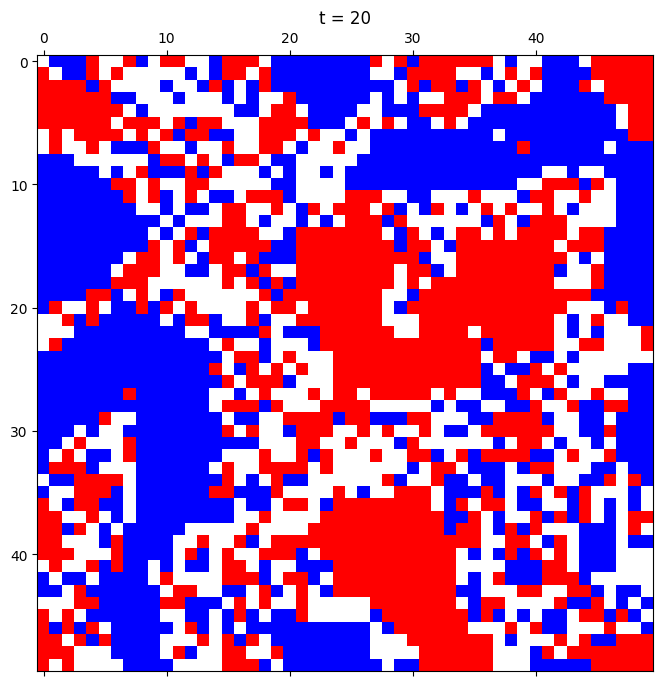

In [26]:
# NOTE: Make sure to run the code in parts A, B, C, D, and E so that your model runs correctly.

# Import the packages we need for animations:
import time
from IPython import display

initializeSchel() # Set our initial world state
observeSchel() # Visualize our initial state

# Let's run the model for 20 timesteps to start
total_time_steps = 20 # <--

for current_timestep in range(total_time_steps): # <-- run the model for total_time_steps
  updateSchel()# <-- What function do we use to update the current world?

  plt.close() # Close the last plot before making the new one
  observeSchel()# <-- Visualize this timestep. What function to we use to observe our world using a visualization?

  # The lines of code below run the animation!
  display.display(plt.gcf())
  display.clear_output(wait=True) # clear the output here
  time.sleep(0.1) # changing this number changes the speed of the visual updates

plt.close()

**Observations**:

By setting the tolerance to num_like_neighbors > 4, we notice that the border between the large blue parts and the large red parts consists of numerous smaller clumps of red and blue.
When agents required more like neighbors to be satisfied, we observe more integrated smaller areas between large clusters of red and blue.  

3. Setting the tolerance to 5 or greater

In [27]:
# We use this function to see if our agent has enough like neighbors to be satisfied. It takes 5 arguments.

def is_satisfied(current_row, current_column, total_rows, total_columns, current_world):

  current_agent_type = current_world[current_row, current_column] # <-- grab the type of the current agent
  num_like_neighbors = 0 # Initialize this variable to count the number of like neighbors in the neighborhood

  enough_like_neighbors = False # Initialize this variable to report if the agent has enough like neighbors to be satisfied.

  # This loop goes through the neighborhood rows. We need to check current_row - 1 (up 1 row), current_row, and current_row + 1 (down 1 row)
  for neigh_row in range(current_row-1, current_row+2): # <--

    # This loop goes through the neighborhood columns. In every row, we need to check current_column - 1 (left 1 column), current_column,
    # and current_column + 1 (right 1 column)
    for neigh_column in range(current_column-1, current_column+2): # <--

      # Add this conditional so that the code doesn't count the current agent as a neighbor
      if not ((neigh_row == current_row) and (neigh_column == current_column)):

        current_neighbor_type = current_world[neigh_row % total_rows, neigh_column % total_columns] # <-- Find the type of the current neighbor

        # If the square we're checking is the same type as the current agent, increase the num_like_neighbors count by 1. Otherwise, do nothing.
        if (current_neighbor_type == current_agent_type):
          num_like_neighbors += 1 # <--

        # If we have more than 8 like neighbors, that's enough, so the function reports that we're satisfied (True)
        if num_like_neighbors > 8: # Set to 8
          enough_like_neighbors = True # <--
          return enough_like_neighbors

  # If we don't have enough like neighbors, we report False
  return enough_like_neighbors

def updateSchel():
    # We declare global variables here so that we don't need to use arguments. All functions can see global variables!
    global time_counter, current_world, agent_locations, empty_locations

    # On every update, the time counter ticks up by 1
    time_counter += 1

    num_agents = len(agent_locations) # <-- Find the number of agents we have by finding the length of the agent_locations list

    # This piece of code takes the number of agents that we have and makes a range() list, just like the ones we normally use
    custom_range_list = list(range(num_agents))
    # But this time, we shuffle the range list so that our for loop goes through the agents in a random order
    random.shuffle(custom_range_list) # <-- Use random.shuffle() to randomize the order of this range list

    # Loop through all of the agents in random order using custom_range_list
    for current_agent in custom_range_list: # <--

        # Grab our current_row and current_column
        current_row, current_column = agent_locations[current_agent]

        # If the agent isn't satisfied, move it to a random empty spot! This is a 5 step process, but each step is simple.
        if not is_satisfied(current_row, current_column, total_rows, total_columns, current_world):
            # 1. Grab a new location from our list of empty spots
            empty_index = random.randint(0, len(empty_locations) - 1)
            new_row, new_column = empty_locations[empty_index]

            # 2. Change the list entry for the current agent to the new location
            agent_locations[current_agent] = (new_row, new_column)

            # 3. To move the agent, set the type of the new location equal to the type of the current location
            current_world[new_row, new_column] = current_world[current_row, current_column] # <--

            # 4. Now add the current location to the empty list
            empty_locations[empty_index] = (current_row, current_column)

            # 5. And remove the agent from the current location by setting it to an empty spot
            current_world[current_row, current_column] = 0 # <--

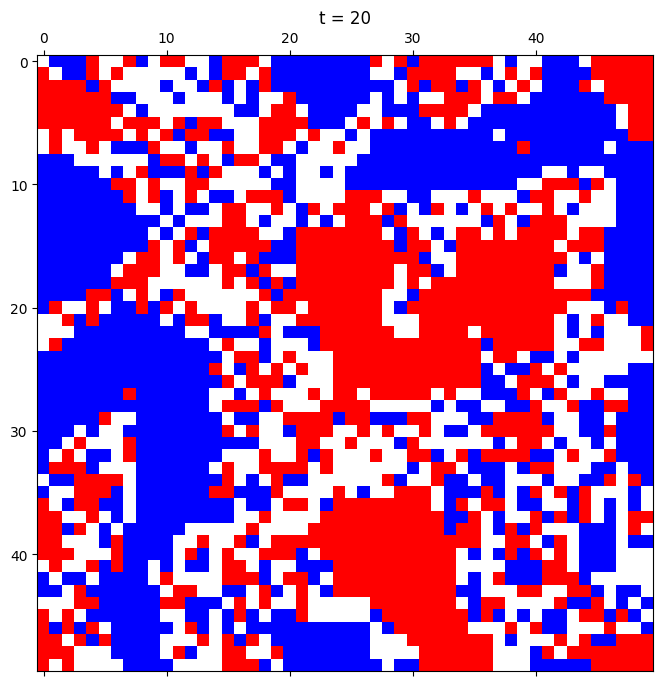

In [28]:
# We need to import some stuff from matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This tells Matplotlib what colors to use! White will be a blank space (0), red will be a red agent (1), and blue will be a blue agent (2)
colorMap = ListedColormap(["white", "red", "blue"]) # <-- make the color map

def observeSchel():
  # This makes the visualization bigger
  fig, ax = plt.subplots(figsize=(8, 8))

  # We pass four arguments to matshow: our 2D array, our map of colors, and vmin/vmax, which tell the computer which numbers correspond to which colors
  ax.matshow(current_world, cmap = colorMap, vmin = 0, vmax = 2) # <-- use plt.matshow to visualize the current_world
  plt.axis('image')
  plt.title('t = ' + str(time_counter)) # This puts the time counter on top of our visualization!
  fig.show()

observeSchel() # Run observeSchel() to visualize the initial condition you made

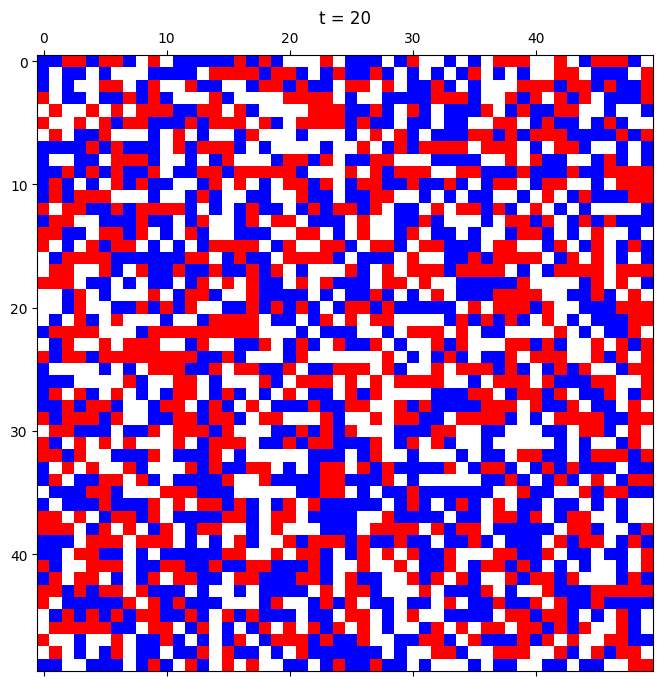

In [29]:
# NOTE: Make sure to run the code in parts A, B, C, D, and E so that your model runs correctly.

# Import the packages we need for animations:
import time
from IPython import display

initializeSchel() # Set our initial world state
observeSchel() # Visualize our initial state

# Let's run the model for 20 timesteps to start
total_time_steps = 20 # <--

for current_timestep in range(total_time_steps): # <-- run the model for total_time_steps
  updateSchel()# <-- What function do we use to update the current world?

  plt.close() # Close the last plot before making the new one
  observeSchel()# <-- Visualize this timestep. What function to we use to observe our world using a visualization?

  # The lines of code below run the animation!
  display.display(plt.gcf())
  display.clear_output(wait=True) # clear the output here
  time.sleep(0.1) # changing this number changes the speed of the visual updates

plt.close()

**Observation:**

When we set the tolerance to 5 or greater (in above example we set it to 8), we notice that the model can never settle to a stable state. The red and the blue cells are shifting and oscillating constantly. This is the case because it is impossible for one agent to have more than 5 identical neighbors in a 8-cell neighborhood. So each cell keeps changing between red and blue in the above model.

4. For grading purpose, return the model to the default model

In [ ]:
# We use this function to see if our agent has enough like neighbors to be satisfied. It takes 5 arguments.

def is_satisfied(current_row, current_column, total_rows, total_columns, current_world):

  current_agent_type = current_world[current_row, current_column] # <-- grab the type of the current agent
  num_like_neighbors = 0 # Initialize this variable to count the number of like neighbors in the neighborhood

  enough_like_neighbors = False # Initialize this variable to report if the agent has enough like neighbors to be satisfied.

  # This loop goes through the neighborhood rows. We need to check current_row - 1 (up 1 row), current_row, and current_row + 1 (down 1 row)
  for neigh_row in range(current_row-1, current_row+2): # <--

    # This loop goes through the neighborhood columns. In every row, we need to check current_column - 1 (left 1 column), current_column,
    # and current_column + 1 (right 1 column)
    for neigh_column in range(current_column-1, current_column+2): # <--

      # Add this conditional so that the code doesn't count the current agent as a neighbor
      if not ((neigh_row == current_row) and (neigh_column == current_column)):

        current_neighbor_type = current_world[neigh_row % total_rows, neigh_column % total_columns] # <-- Find the type of the current neighbor

        # If the square we're checking is the same type as the current agent, increase the num_like_neighbors count by 1. Otherwise, do nothing.
        if (current_neighbor_type == current_agent_type):
          num_like_neighbors += 1 # <--

        # If we have more than 3 like neighbors, that's enough, so the function reports that we're satisfied (True)
        if num_like_neighbors > 3: # <--
          enough_like_neighbors = True # <--
          return enough_like_neighbors

  # If we don't have enough like neighbors, we report False
  return enough_like_neighbors

def updateSchel():
    # We declare global variables here so that we don't need to use arguments. All functions can see global variables!
    global time_counter, current_world, agent_locations, empty_locations

    # On every update, the time counter ticks up by 1
    time_counter += 1

    num_agents = len(agent_locations) # <-- Find the number of agents we have by finding the length of the agent_locations list

    # This piece of code takes the number of agents that we have and makes a range() list, just like the ones we normally use
    custom_range_list = list(range(num_agents))
    # But this time, we shuffle the range list so that our for loop goes through the agents in a random order
    random.shuffle(custom_range_list) # <-- Use random.shuffle() to randomize the order of this range list

    # Loop through all of the agents in random order using custom_range_list
    for current_agent in custom_range_list: # <--

        # Grab our current_row and current_column
        current_row, current_column = agent_locations[current_agent]

        # If the agent isn't satisfied, move it to a random empty spot! This is a 5 step process, but each step is simple.
        if not is_satisfied(current_row, current_column, total_rows, total_columns, current_world):
            # 1. Grab a new location from our list of empty spots
            empty_index = random.randint(0, len(empty_locations) - 1)
            new_row, new_column = empty_locations[empty_index]

            # 2. Change the list entry for the current agent to the new location
            agent_locations[current_agent] = (new_row, new_column)

            # 3. To move the agent, set the type of the new location equal to the type of the current location
            current_world[new_row, new_column] = current_world[current_row, current_column] # <--

            # 4. Now add the current location to the empty list
            empty_locations[empty_index] = (current_row, current_column)

            # 5. And remove the agent from the current location by setting it to an empty spot
            current_world[current_row, current_column] = 0 # <--

In [ ]:
# We need to import some stuff from matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This tells Matplotlib what colors to use! White will be a blank space (0), red will be a red agent (1), and blue will be a blue agent (2)
colorMap = ListedColormap(["white", "red", "blue"]) # <-- make the color map

def observeSchel():
  # This makes the visualization bigger
  fig, ax = plt.subplots(figsize=(8, 8))

  # We pass four arguments to matshow: our 2D array, our map of colors, and vmin/vmax, which tell the computer which numbers correspond to which colors
  ax.matshow(current_world, cmap = colorMap, vmin = 0, vmax = 2) # <-- use plt.matshow to visualize the current_world
  plt.axis('image')
  plt.title('t = ' + str(time_counter)) # This puts the time counter on top of our visualization!
  fig.show()

observeSchel() # Run observeSchel() to visualize the initial condition you made

In [ ]:

# NOTE: Make sure to run the code in parts A, B, C, D, and E so that your model runs correctly.

# Import the packages we need for animations:
import time
from IPython import display

initializeSchel() # Set our initial world state
observeSchel() # Visualize our initial state

# Let's run the model for 20 timesteps to start
total_time_steps = 20 # <--

for current_timestep in range(total_time_steps): # <-- run the model for total_time_steps
  updateSchel()# <-- What function do we use to update the current world?

  plt.close() # Close the last plot before making the new one
  observeSchel()# <-- Visualize this timestep. What function to we use to observe our world using a visualization?

  # The lines of code below run the animation!
  display.display(plt.gcf())
  display.clear_output(wait=True) # clear the output here
  time.sleep(0.1) # changing this number changes the speed of the visual updates

plt.close()

**5.H** (Extra credit: 6 points) Another method of coding this model is to have the tolerance be a percentage of the agents that are nearby. This looks like the following:

```(num_like_agents / total_agent_neighbors) > tolerance_percentage```

When you code it this way, the calculation doesn't take into account empty squares, possibly giving you a different result. This is because EMPTY SPOTS DO NOT COUNT AS AGENTS!

**I.** Copy and paste the ```is_satisfied()``` function into the codeblock below, rename it ```is_satisfied1()```, and alter it to do the following:


*   Have a counter for the total agent neighbors in the neighborhood
*   Properly increment this counter when an agent neighbor is encountered
*   Change the tolerance to a percentage of like neighbors out of the total number of agent neighbors, not including empty spots.



In [56]:
# <-- is_satisfied1() goes here
def is_satisfied1(current_row, current_column, total_rows, total_columns, current_world):

  current_agent_type = current_world[current_row, current_column] # <-- grab the type of the current agent
  num_like_neighbors = 0 # Initialize this variable to count the number of like neighbors in the neighborhood

  # Have a counter for the total agent neighbors in the neighborhood
  total_agent_neighbors = 0

  enough_like_neighbors = False # Initialize this variable to report if the agent has enough like neighbors to be satisfied.

  # This loop goes through the neighborhood rows. We need to check current_row - 1 (up 1 row), current_row, and current_row + 1 (down 1 row)
  for neigh_row in range(current_row-1, current_row+2): # <--

    # This loop goes through the neighborhood columns. In every row, we need to check current_column - 1 (left 1 column), current_column,
    # and current_column + 1 (right 1 column)
    for neigh_column in range(current_column-1, current_column+2): # <--

      # Add this conditional so that the code doesn't count the current agent as a neighbor
      if not ((neigh_row == current_row) and (neigh_column == current_column)):

        current_neighbor_type = current_world[neigh_row % total_rows, neigh_column % total_columns] # <-- Find the type of the current neighbor

        # Properly increment this counter when an agent neighbor is encountered
        if current_neighbor_type != 0:
          total_agent_neighbors += 1

        # If the square we're checking is the same type as the current agent, increase the num_like_neighbors count by 1. Otherwise, do nothing.
        if (current_neighbor_type == current_agent_type):
          num_like_neighbors += 1 # <--

  # We can also change the tolerance_percentage below to other number
  tolerance_percentage = 0.5

  # Change the tolerance to a percentage of like neighbors out of the total number of agent neighbors, not including empty spots.
  if total_agent_neighbors > 0:
    if (num_like_neighbors / total_agent_neighbors) > tolerance_percentage:
      enough_like_neighbors = True

  # If we don't have enough like neighbors, we report False
  return enough_like_neighbors

**II.** Adjust your ```updateSchel()``` function to use ```is_satisfied1()```. Now, mess around with the model a bit. Do you observe any noticeable changes?
>*FOR GRADING PURPOSES, RETURN THE MODEL TO ITS DEFAULTS AFTER ANSWERING THIS QUESTION*

In [57]:
def updateSchel():
    # We declare global variables here so that we don't need to use arguments. All functions can see global variables!
    global time_counter, current_world, agent_locations, empty_locations

    # On every update, the time counter ticks up by 1
    time_counter += 1

    num_agents = len(agent_locations) # <-- Find the number of agents we have by finding the length of the agent_locations list

    # This piece of code takes the number of agents that we have and makes a range() list, just like the ones we normally use
    custom_range_list = list(range(num_agents))
    # But this time, we shuffle the range list so that our for loop goes through the agents in a random order
    random.shuffle(custom_range_list) # <-- Use random.shuffle() to randomize the order of this range list

    # Loop through all of the agents in random order using custom_range_list
    for current_agent in custom_range_list: # <--

        # Grab our current_row and current_column
        current_row, current_column = agent_locations[current_agent]

        # If the agent isn't satisfied, move it to a random empty spot! This is a 5 step process, but each step is simple.
        if not is_satisfied1(current_row, current_column, total_rows, total_columns, current_world):
            # 1. Grab a new location from our list of empty spots
            empty_index = random.randint(0, len(empty_locations) - 1)
            new_row, new_column = empty_locations[empty_index]

            # 2. Change the list entry for the current agent to the new location
            agent_locations[current_agent] = (new_row, new_column)

            # 3. To move the agent, set the type of the new location equal to the type of the current location
            current_world[new_row, new_column] = current_world[current_row, current_column] # <--

            # 4. Now add the current location to the empty list
            empty_locations[empty_index] = (current_row, current_column)

            # 5. And remove the agent from the current location by setting it to an empty spot
            current_world[current_row, current_column] = 0 # <--

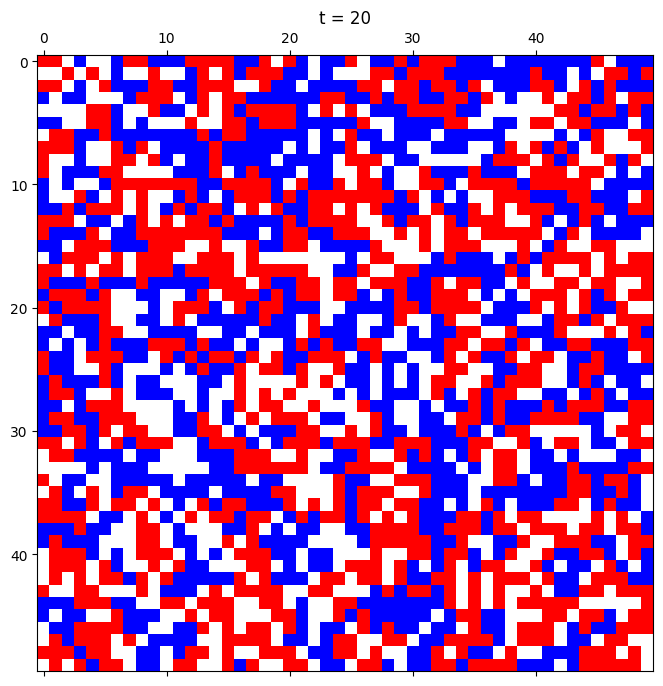

In [58]:
# We need to import some stuff from matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This tells Matplotlib what colors to use! White will be a blank space (0), red will be a red agent (1), and blue will be a blue agent (2)
colorMap = ListedColormap(["white", "red", "blue"]) # <-- make the color map

def observeSchel():
  # This makes the visualization bigger
  fig, ax = plt.subplots(figsize=(8, 8))

  # We pass four arguments to matshow: our 2D array, our map of colors, and vmin/vmax, which tell the computer which numbers correspond to which colors
  ax.matshow(current_world, cmap = colorMap, vmin = 0, vmax = 2) # <-- use plt.matshow to visualize the current_world
  plt.axis('image')
  plt.title('t = ' + str(time_counter)) # This puts the time counter on top of our visualization!
  fig.show()

observeSchel() # Run observeSchel() to visualize the initial condition you made

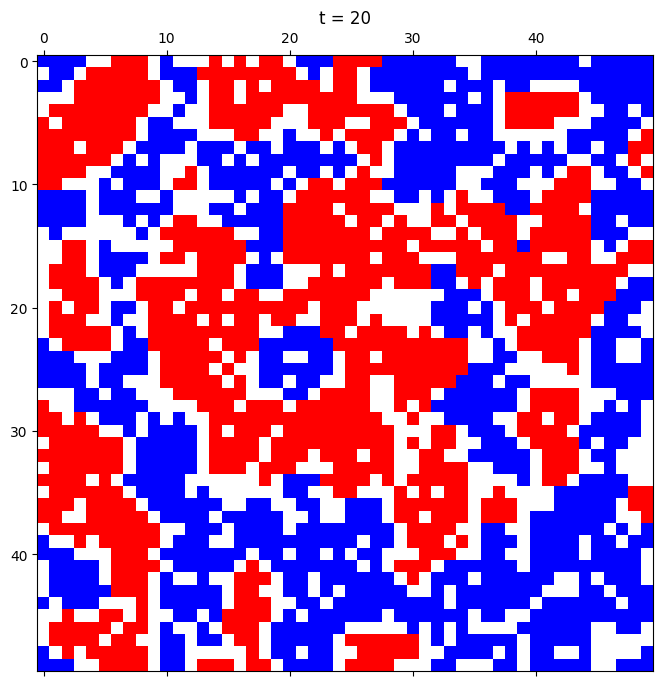

In [59]:
# NOTE: Make sure to run the code in parts A, B, C, D, and E so that your model runs correctly.

# Import the packages we need for animations:
import time
from IPython import display

initializeSchel() # Set our initial world state
observeSchel() # Visualize our initial state

# Let's run the model for 20 timesteps to start
total_time_steps = 20 # <--

for current_timestep in range(total_time_steps): # <-- run the model for total_time_steps
  updateSchel()# <-- What function do we use to update the current world?

  plt.close() # Close the last plot before making the new one
  observeSchel()# <-- Visualize this timestep. What function to we use to observe our world using a visualization?

  # The lines of code below run the animation!
  display.display(plt.gcf())
  display.clear_output(wait=True) # clear the output here
  time.sleep(0.1) # changing this number changes the speed of the visual updates

plt.close()

**Observation:**

When we set the tolerance percentage to 0.5 and run the model, we can see that the clumps of red and blue parts tend to be larger and continuous. The border and edge between each clusters are separated by empty white space.


Similarly, if we increase the tolerance percentage to 0.8, we notice that the model can never settle down to a fixed state. Cells are oscillating and shifting between red and blue.



4. For grading purpose, return the model to the default model

In [60]:
# We use this function to see if our agent has enough like neighbors to be satisfied. It takes 5 arguments.

def is_satisfied(current_row, current_column, total_rows, total_columns, current_world):

  current_agent_type = current_world[current_row, current_column] # <-- grab the type of the current agent
  num_like_neighbors = 0 # Initialize this variable to count the number of like neighbors in the neighborhood

  enough_like_neighbors = False # Initialize this variable to report if the agent has enough like neighbors to be satisfied.

  # This loop goes through the neighborhood rows. We need to check current_row - 1 (up 1 row), current_row, and current_row + 1 (down 1 row)
  for neigh_row in range(current_row-1, current_row+2): # <--

    # This loop goes through the neighborhood columns. In every row, we need to check current_column - 1 (left 1 column), current_column,
    # and current_column + 1 (right 1 column)
    for neigh_column in range(current_column-1, current_column+2): # <--

      # Add this conditional so that the code doesn't count the current agent as a neighbor
      if not ((neigh_row == current_row) and (neigh_column == current_column)):

        current_neighbor_type = current_world[neigh_row % total_rows, neigh_column % total_columns] # <-- Find the type of the current neighbor

        # If the square we're checking is the same type as the current agent, increase the num_like_neighbors count by 1. Otherwise, do nothing.
        if (current_neighbor_type == current_agent_type):
          num_like_neighbors += 1 # <--

        # If we have more than 3 like neighbors, that's enough, so the function reports that we're satisfied (True)
        if num_like_neighbors > 3: # <--
          enough_like_neighbors = True # <--
          return enough_like_neighbors

  # If we don't have enough like neighbors, we report False
  return enough_like_neighbors

def updateSchel():
    # We declare global variables here so that we don't need to use arguments. All functions can see global variables!
    global time_counter, current_world, agent_locations, empty_locations

    # On every update, the time counter ticks up by 1
    time_counter += 1

    num_agents = len(agent_locations) # <-- Find the number of agents we have by finding the length of the agent_locations list

    # This piece of code takes the number of agents that we have and makes a range() list, just like the ones we normally use
    custom_range_list = list(range(num_agents))
    # But this time, we shuffle the range list so that our for loop goes through the agents in a random order
    random.shuffle(custom_range_list) # <-- Use random.shuffle() to randomize the order of this range list

    # Loop through all of the agents in random order using custom_range_list
    for current_agent in custom_range_list: # <--

        # Grab our current_row and current_column
        current_row, current_column = agent_locations[current_agent]

        # If the agent isn't satisfied, move it to a random empty spot! This is a 5 step process, but each step is simple.
        if not is_satisfied(current_row, current_column, total_rows, total_columns, current_world):
            # 1. Grab a new location from our list of empty spots
            empty_index = random.randint(0, len(empty_locations) - 1)
            new_row, new_column = empty_locations[empty_index]

            # 2. Change the list entry for the current agent to the new location
            agent_locations[current_agent] = (new_row, new_column)

            # 3. To move the agent, set the type of the new location equal to the type of the current location
            current_world[new_row, new_column] = current_world[current_row, current_column] # <--

            # 4. Now add the current location to the empty list
            empty_locations[empty_index] = (current_row, current_column)

            # 5. And remove the agent from the current location by setting it to an empty spot
            current_world[current_row, current_column] = 0 # <--

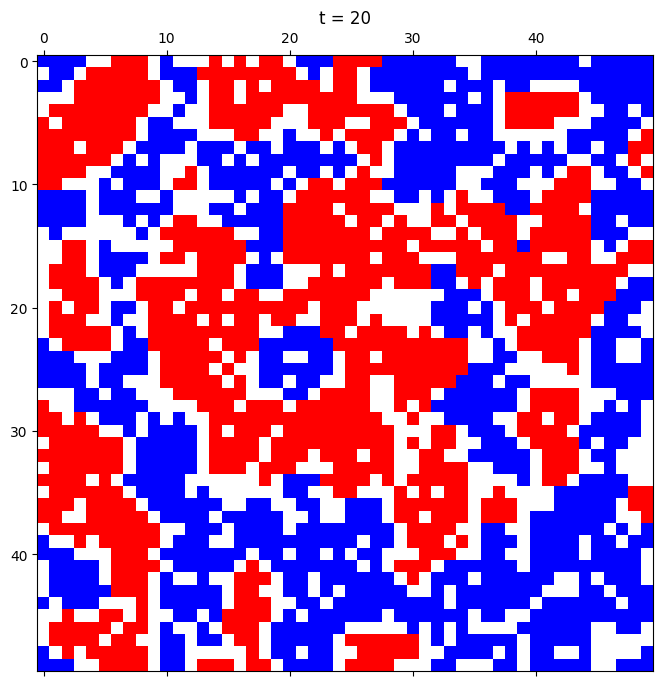

In [61]:
# We need to import some stuff from matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This tells Matplotlib what colors to use! White will be a blank space (0), red will be a red agent (1), and blue will be a blue agent (2)
colorMap = ListedColormap(["white", "red", "blue"]) # <-- make the color map

def observeSchel():
  # This makes the visualization bigger
  fig, ax = plt.subplots(figsize=(8, 8))

  # We pass four arguments to matshow: our 2D array, our map of colors, and vmin/vmax, which tell the computer which numbers correspond to which colors
  ax.matshow(current_world, cmap = colorMap, vmin = 0, vmax = 2) # <-- use plt.matshow to visualize the current_world
  plt.axis('image')
  plt.title('t = ' + str(time_counter)) # This puts the time counter on top of our visualization!
  fig.show()

observeSchel() # Run observeSchel() to visualize the initial condition you made

# NOTE: Make sure to run the code in parts A, B, C, D, and E so that your model runs correctly.

# Import the packages we need for animations:
import time
from IPython import display

initializeSchel() # Set our initial world state
observeSchel() # Visualize our initial state

# Let's run the model for 20 timesteps to start
total_time_steps = 20 # <--

for current_timestep in range(total_time_steps): # <-- run the model for total_time_steps
  updateSchel()# <-- What function do we use to update the current world?

  plt.close() # Close the last plot before making the new one
  observeSchel()# <-- Visualize this timestep. What function to we use to observe our world using a visualization?

  # The lines of code below run the animation!
  display.display(plt.gcf())
  display.clear_output(wait=True) # clear the output here
  time.sleep(0.1) # changing this number changes the speed of the visual updates

plt.close()